# Inside the Riksdag: A data-driven look at Swedish parliamentary motions

---

## The brief

> **Publication:** Dagens Data (fictional Swedish data journalism outlet)
>
> **Your role:** Data journalist
>
> **Context:** Sweden's parliamentary election is approaching. Your editor wants a data-driven feature exploring what politicians actually spend their time proposing. You have access to a dataset of over 16,000 parliamentary motions from 2020-2024, including AI-generated summaries and ideological classifications.
>
> **Your task:** Explore this dataset, create compelling visualizations, and uncover insights that would interest readers. Think like a journalist: What stories does this data tell? What surprises you? What patterns emerge?

---

## Understanding parliamentary motions

A **motion** is a formal proposal submitted by members of parliament. Anyone in the Riksdag can submit a motion suggesting new laws, policy changes, or government actions. Most motions don't become law, but they reveal what politicians prioritize and how parties differ.

### What's in this dataset?

Each row represents one motion. Key columns include:

- **party** - The political party of the main author
- **main_author** - The politician who submitted the motion
- **handed_in** - Date submitted
- **key_political_area** - Topic category (Law, Health, Economy, etc.)
- **economic_direction** - Classified as left, neutral, or right
- **democratic_direction** - Classified as authoritarian, neutral, or libertarian
- **summary** - AI-generated English summary of the motion

<details>
<summary><strong>Click here for full column reference</strong></summary>

| Column | Description |
|--------|-------------|
| `id` | Motion identifier |
| `title` | Swedish title of the motion |
| `main_author` | Politician who submitted the motion |
| `party` | Political party affiliation |
| `type` | Document type (mot = motion) |
| `motion_id` | Full motion identifier |
| `handed_in` | Date the motion was submitted |
| `summary` | AI-generated English summary |
| `economic_direction` | Ideological classification: left, neutral, or right |
| `democratic_direction` | Ideological classification: authoritarian, neutral, or libertarian |
| `key_political_area` | Topic category |
</details>

### Swedish political parties (for reference)

| Abbr | Party | English | Traditional position |
|------|-------|---------|---------------------|
| S | Socialdemokraterna | Social Democrats | Center-left |
| M | Moderaterna | Moderates | Center-right |
| SD | Sverigedemokraterna | Sweden Democrats | Right-wing populist |
| C | Centerpartiet | Centre Party | Liberal/agrarian |
| V | Vänsterpartiet | Left Party | Left-wing |
| KD | Kristdemokraterna | Christian Democrats | Center-right |
| MP | Miljöpartiet | Green Party | Green |
| L | Liberalerna | Liberals | Liberal |

---

## A note on data quality

Like most real-world datasets, this one has some quirks. A good data journalist always checks their data before publishing!

**Things to be aware of:**

- **Missing values:** About 7% of rows are missing `party` and `main_author` values
- **Party naming:** Most entries use abbreviations (M, S, SD...), but some use full names ("Moderaterna", "Centerpartiet")
- **Multi-party motions:** A few motions were submitted by multiple parties together (e.g., "M, KD")
- **Ideology columns:** A small number of rows (~143) have values that seem misclassified

**Tip:** Before diving into analysis, use `value_counts()` to understand what values you're actually working with. For clean party comparisons, you may want to filter to the main 8 parties:

```python
main_parties = ['M', 'S', 'SD', 'C', 'KD', 'MP', 'V', 'L']
df_clean = df[df['party'].isin(main_parties)]
```

---

## My analysis solve questions like:-

### The party landscape
- Which parties submit the most motions? Has this changed over time?
- Who are the most prolific individual politicians?

### Political priorities
- What topics dominate parliamentary debate?
- Do different parties focus on different issues? Can you visualize this?

### The political compass
- How do parties distribute across economic (left/right) and democratic (authoritarian/libertarian) dimensions?
- Are some parties more ideologically consistent than others?

### Trends over time
- How has parliamentary activity changed from 2020 to 2024?
- Are certain topics rising or falling in importance?

### Deep dives
- Pick a topic area (e.g., Environment, Immigration) and explore which parties engage with it
- Find the most prolific author and characterize their focus areas

---

## My analysis
*Remember: You're building a story. Each visualization should have context and a takeaway.*

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("political_motions.csv")

In [5]:
df.sample() # to check the data

,id,title,main_author,party,type,motion_id,handed_in,summary,economic_direction,democratic_direction,key_political_area,submitted_by,motion_category,assigned_to,motion_deadline
6585,2023/24:2873,med anledning av skr. 2023/24:114 Strategisk e...,Håkan Svenneling,V,mot,Motion 2023/24:2873 av Håkan Svenneling m.fl. (V),2024-04-18,The motion proposes that the Swedish Parliamen...,neutral,libertarian,Law and Justice,NaN,NaN,NaN,NaN


In [6]:
df.info()# to check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16420 entries, 0 to 16419
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    16419 non-null  object
 1   title                 16420 non-null  object
 2   main_author           15227 non-null  object
 3   party                 15227 non-null  object
 4   type                  16420 non-null  object
 5   motion_id             16420 non-null  object
 6   handed_in             16312 non-null  object
 7   summary               16277 non-null  object
 8   economic_direction    16277 non-null  object
 9   democratic_direction  16277 non-null  object
 10  key_political_area    16277 non-null  object
 11  submitted_by          22 non-null     object
 12  motion_category       3185 non-null   object
 13  assigned_to           3201 non-null   object
 14  motion_deadline       22 non-null     object
dtypes: object(15)
memory usage: 1.9+ MB


# Clean the Data for analyze

In [7]:
#check how many missing values in average
df.isna().mean().sort_values(ascending=False)

motion_deadline         0.998660
submitted_by            0.998660
motion_category         0.806029
assigned_to             0.805055
main_author             0.072655
party                   0.072655
key_political_area      0.008709
economic_direction      0.008709
democratic_direction    0.008709
summary                 0.008709
handed_in               0.006577
id                      0.000061
motion_id               0.000000
title                   0.000000
type                    0.000000
dtype: float64

In [8]:
#submitted_by, motion_category, assigned_to, motion_deadline these four column has most NAN values .So I drop these columns

df=df.drop(columns=["submitted_by", "motion_category","assigned_to","motion_deadline"])

In [9]:
# change handed_in column from string to datetime
df["handed_in"]= pd.to_datetime(df["handed_in"],errors= "coerce")

In [10]:
#check if there any duplicated rows from motion_id
df[df.duplicated(subset=["motion_id"],keep=False)]

,id,title,main_author,party,type,motion_id,handed_in,summary,economic_direction,democratic_direction,key_political_area
1783,Proposition 2021/22:1,Budgetpropositionen för 2022,NaN,NaN,Proposition,Proposition 2021/22:1,2021-09-20,The proposal presents a correction to the expe...,neutral,neutral,Economy and Finance
1784,2021/22:1,Budgetpropositionen för 2022 - Utgiftsområde 8...,NaN,NaN,Proposition,Proposition 2021/22:1,NaT,The proposal outlines the Swedish government's...,left,neutral,Immigration and Integration
1785,2021/22:1,Budgetpropositionen för 2022 - Utgiftsområde 7...,NaN,NaN,Proposition,Proposition 2021/22:1,NaT,The proposal outlines the framework for Sweden...,left,neutral,Foreign Affairs and International Relations
1786,2021/22:1,Budgetpropositionen för 2022 - Utgiftsområde 6...,NaN,NaN,Proposition,Proposition 2021/22:1,NaT,The government of Sweden proposes a series of ...,left,authoritarian,Defense and Security
1787,2021/22:1,Budgetpropositionen för 2022 - Utgiftsområde 5...,NaN,NaN,Proposition,Proposition 2021/22:1,NaT,The proposal outlines the Swedish government's...,neutral,neutral,Foreign Affairs and International Relations
...,...,...,...,...,...,...,...,...,...,...,...
16215,2024/25:1,Budgetpropositionen för 2025 - Utgiftsområde 1...,NaN,NaN,Proposition,Proposition 2024/25:1,NaT,The proposition outlines the budgetary provisi...,left,neutral,Labor and Employment
16216,2024/25:1,Budgetpropositionen för 2025 - Utgiftsområde 1...,NaN,NaN,Proposition,Proposition 2024/25:1,NaT,The proposal outlines the budget for the Riket...,neutral,authoritarian,Government and Public Administration
16217,2024/25:1,Budgetpropositionen för 2025 - Utgiftsområde 1...,NaN,NaN,Proposition,Proposition 2024/25:1,NaT,The proposition suggests approving the budget ...,left,authoritarian,Housing and Urban Development
16218,2024/25:1,Budgetpropositionen för 2025 - Utgiftsområde 5...,NaN,NaN,Proposition,Proposition 2024/25:1,NaT,The proposal includes budget decisions for Int...,left,authoritarian,Foreign Affairs and International Relations


In [11]:
#drop all those duplicates columns
df= (df.sort_values("handed_in").drop_duplicates(subset=["motion_id"], keep="last"))

In [12]:
#final check is there any duplicates
df.duplicated(subset=["motion_id"]).sum()

np.int64(0)

In [13]:
# to fillup main author NAN value to unknown
df["main_author"]=df["main_author"].fillna("unknown")
df["party"]=df["party"].fillna("unknown")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16312 entries, 6504 to 16218
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    16311 non-null  object        
 1   title                 16312 non-null  object        
 2   main_author           16312 non-null  object        
 3   party                 16312 non-null  object        
 4   type                  16312 non-null  object        
 5   motion_id             16312 non-null  object        
 6   handed_in             16306 non-null  datetime64[ns]
 7   summary               16172 non-null  object        
 8   economic_direction    16172 non-null  object        
 9   democratic_direction  16172 non-null  object        
 10  key_political_area    16172 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.5+ MB


In [258]:
# make all full party name to short name 
df["party"]=(
  df["party"]
      .str.replace("Centerpartiet", "C", regex=False)
      .str.replace("Kristdemokraterna", "KD", regex=False)
      .str.replace("Miljöpartiet", "MP", regex=False)
      .str.replace("Moderaterna", "M", regex=False)
      .str.replace("Socialdemokraterna", "S", regex=False)
      .str.replace("unknown", "Unknown", regex=False)
      .str.replace("-", "Unknown", regex=False)
)

In [16]:
#Which parties submit the most motions?
partywise_motion_count= df.groupby("party")["motion_id"].count()
partywise_motion_count

party
C               1719
C, S, L            1
KD              1155
KD, M              1
L                471
M               4023
M, C, KD           3
M, KD             26
M, L               1
M, SD, KD, L       1
MP               702
MP, S              2
S               3282
SD              3154
Unknown         1144
V                627
Name: motion_id, dtype: int64

In [17]:
# now I have to split parties who have joint motion
df_long=(df.assign(party=df["party"].str.split(", ")).explode("party"))


# The party landscape

In [19]:
party_counts=df_long["party"].value_counts() #check who are the top motion parties
party_counts=party_counts.drop("Unknown", errors= "ignore") # drop all unknown party
party_counts=pd.DataFrame(party_counts)
party_counts

,count
party,
M,4055
S,3285
SD,3155
C,1723
KD,1186
MP,704
V,627
L,474


Text(0.5, 1.0, 'Parties are most prolific')

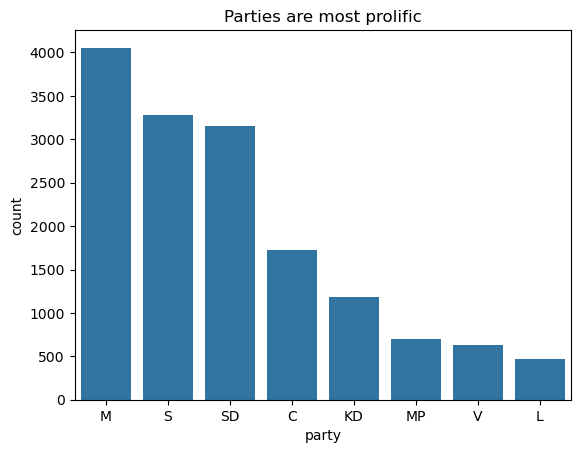

In [45]:
sns.barplot(data=party_counts, x= "party", y= "count")
plt.title('Parties are most prolific')

#My findings:- Motion data shows that Moderaterna (4,055), Socialdemokraterna (3,285), and Sverigedemokraterna (3,155) are the most active parties.
There is a clear drop in motion activity after the top three, indicating that legislative activity is concentrated among a small number of parties.

In [20]:
#analize motions per party per year
df_long["year"]= df_long["handed_in"].astype(str).str[:4]

In [157]:
#Motions per party per year
df_tmp = df_long[df_long["party"] != "Unknown"].copy() # to clean all unknown party info
df_tmp["year"] = df_tmp["handed_in"].dt.year

party_year = (
    df_tmp
        .groupby(["year", "party"])
        .size()
        .reset_index(name="motions")
)


In [158]:
#to see the trend year wise
party_year_pivot= (party_year.pivot(          
    index="year",
    columns= "party",
    values="motions").fillna(0).astype(int))


party_year_pivot= pd.DataFrame(party_year_pivot)
party_year_pivot

party,C,KD,L,M,MP,S,SD,V
year,,,,,,,,
2020,400,251,206,1499,77,665,732,143
2021,299,261,52,607,74,405,567,112
2022,356,211,91,545,173,605,581,144
2023,329,177,72,612,188,797,570,125
2024,339,286,53,792,192,813,705,103


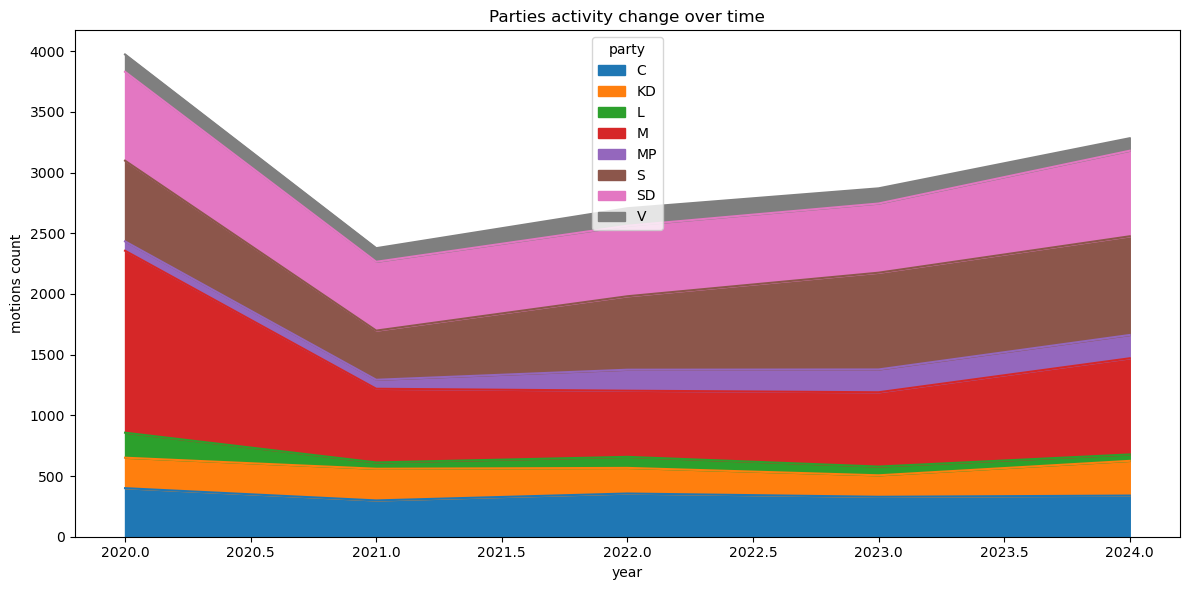

In [80]:
party_year_pivot.plot.area(figsize=(12,6))
plt.title('Parties activity change over time')
plt.ylabel("motions count")
plt.tight_layout()
plt.show()

#My findings :- Motion activity drops sharply across all parties in 2021, followed by a gradual recovery from 2022–2024.
Moderaterna (M), Socialdemokraterna (S), and SD consistently show the highest activity over time, while smaller parties remain comparatively stable at lower levels.

In [244]:
#find out Who are the most prolific individual politicians?
individ_poli= df_tmp.groupby("main_author")["main_author"].value_counts().sort_values(ascending= False).head(6)
individ_poli= pd.DataFrame(individ_poli)
individ_poli

,count
main_author,
Markus Wiechel,580
Sten Bergheden,532
Ann-Sofie Lifvenhage,465
Boriana Åberg,210
Magnus Manhammar,203
Magnus Jacobsson,148


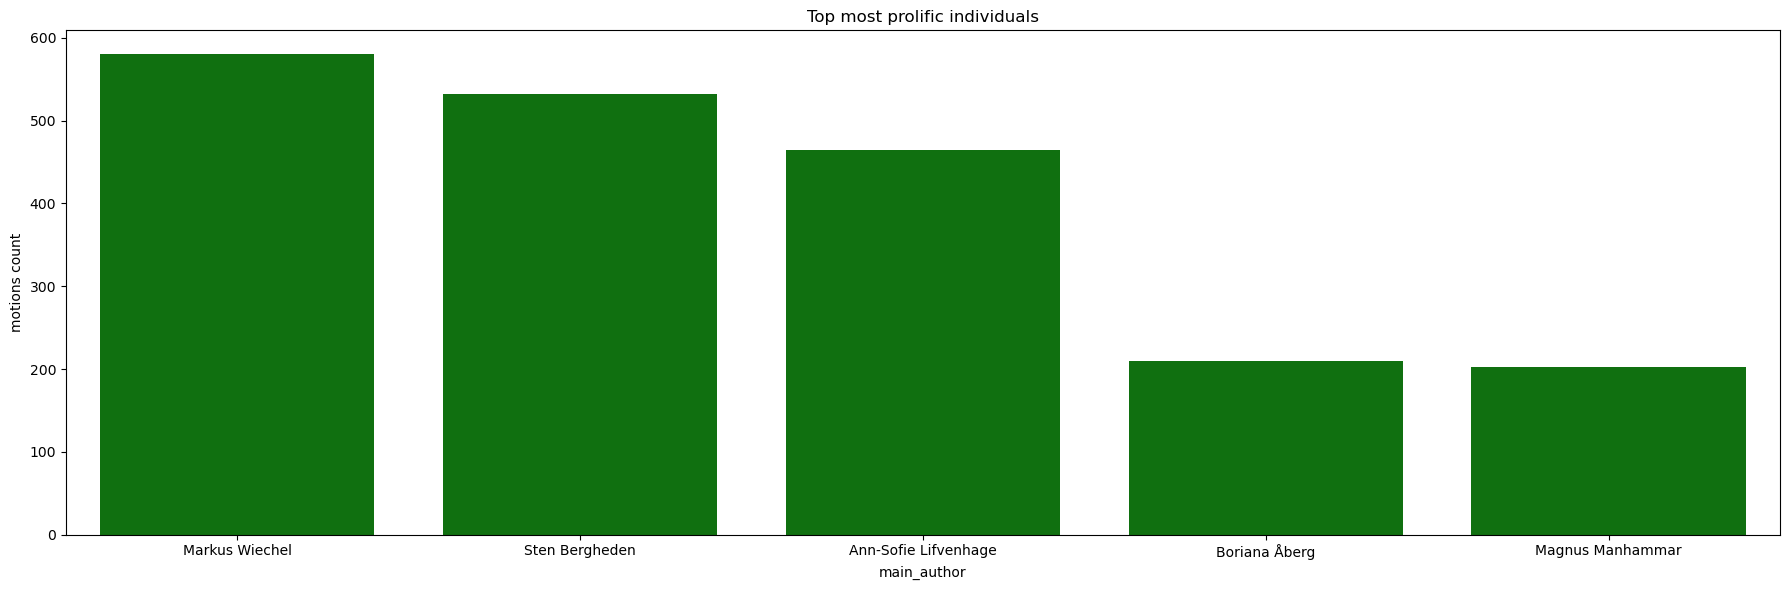

In [63]:
#PLot for profilic individuals
plt.figure(figsize=(18,6))
sns.barplot(data=individ_poli, x= "main_author", y= "count", color= "green")

plt.title('Top most prolific individuals')
plt.ylabel("motions count")
plt.tight_layout()
plt.show()

#Based on motion counts by main author, Markus Wiechel is the most prolific politician with 580 motions, followed by Sten Bergheden (532) and Ann-Sofie Lifvenhage (465).
There is a sharp drop after the top three, indicating that motion activity is highly concentrated among a small number of individual politicians.

# Political priorities

In [65]:
df_long.sample()

,id,title,main_author,party,type,motion_id,handed_in,summary,economic_direction,democratic_direction,key_political_area,year
10874,2022/23:1272,Förarbevis för övriga motordrivna fordon,Jörgen Grubb,SD,mot,Motion 2022/23:1272 av Jörgen Grubb (SD),2022-11-22,The motion proposes that the Swedish parliamen...,left,neutral,Social Welfare and Services,2022


In [137]:
#What topics dominate parliamentary debate?
topic_focus= df_tmp.groupby("key_political_area").size().sort_values(ascending=False).reset_index(name= "motions")
topic_focus=pd.DataFrame(topic_focus)
topic_focus

,key_political_area,motions
0,Law and Justice,1925
1,Economy and Finance,1720
2,Health and Healthcare,1631
3,Infrastructure and Transportation,1557
4,Environment and Natural Resources,1452
5,Education and Research,1212
6,Social Welfare and Services,720
7,Government and Public Administration,671
8,Housing and Urban Development,553
9,Agriculture and Fisheries,480


Text(0.5, 1.0, 'Topic Dominating Parliamentary Debate')

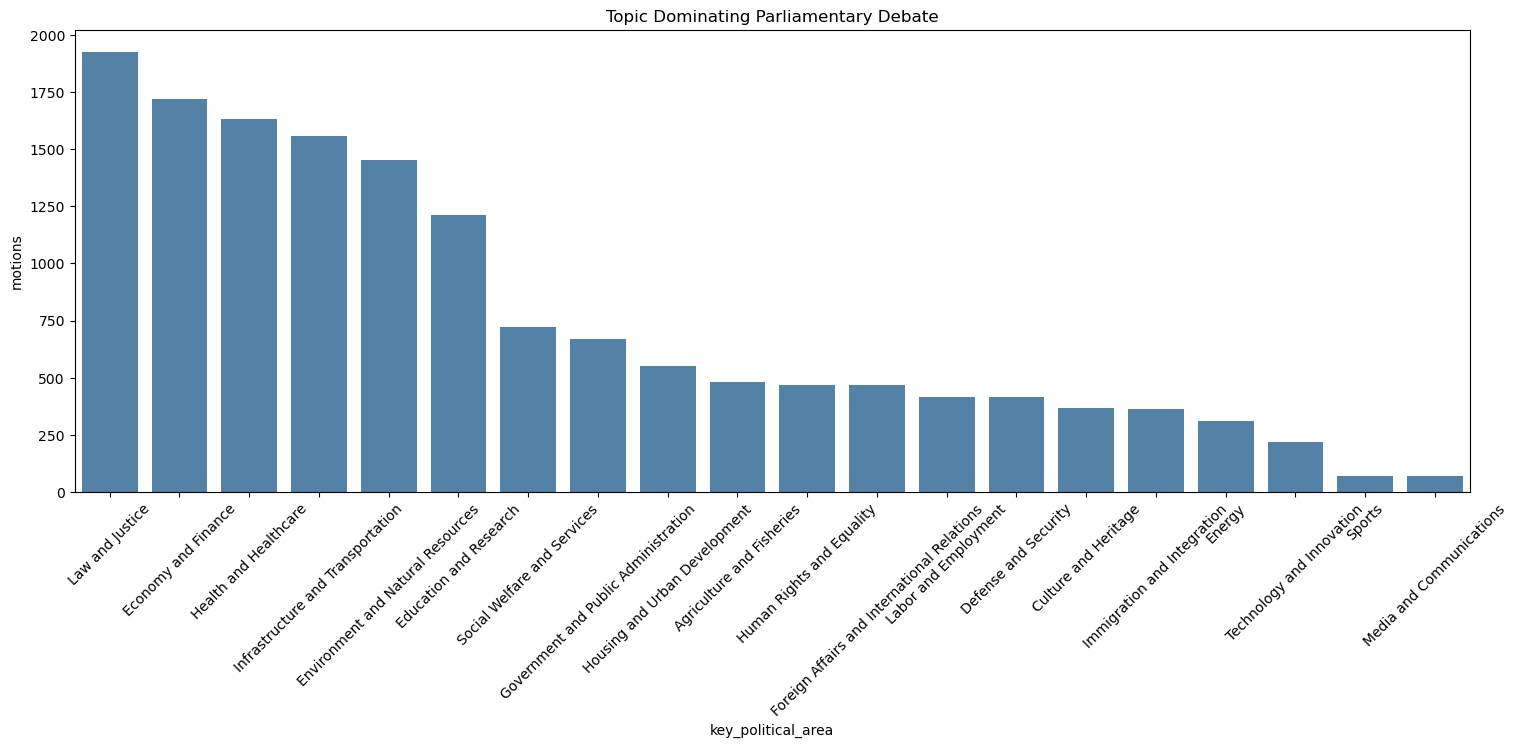

In [150]:
plt.figure(figsize=(18,6))
sns.barplot(data= topic_focus, x= "key_political_area", y= "motions",color= "steelblue" )
plt.xticks(rotation=45)
plt.title("Topic Dominating Parliamentary Debate")

#Parliamentary debate is dominated by Law and Justice, Economy and Finance, and Health and Healthcare, each accounting for over 1,600 motions.
Infrastructure, environment, and education also receive substantial attention, while topics such as sports, media, and technology appear far less frequently.

In [127]:

#Do different parties focus on different issues? Can you visualize this?
party_focus= (df_tmp.groupby(["party","key_political_area"]).size().reset_index(name="motions"))
party_focus_area= (party_focus.pivot(index= "party", columns= "key_political_area", values= "motions").fillna(0).astype(int))
party_focus_area= pd.DataFrame(party_focus_area)
party_focus_area= party_focus_area.reset_index()
party_focus_area
party_focus_df = party_focus_area.melt(
    id_vars="party",
    var_name="key_political_area",
    value_name="motions"
)

party_focus_df.columns
party_focus_df

,party,key_political_area,motions
0,C,Agriculture and Fisheries,80
1,KD,Agriculture and Fisheries,45
2,L,Agriculture and Fisheries,21
3,M,Agriculture and Fisheries,153
4,MP,Agriculture and Fisheries,19
...,...,...,...
155,M,Technology and Innovation,60
156,MP,Technology and Innovation,9
157,S,Technology and Innovation,49
158,SD,Technology and Innovation,53


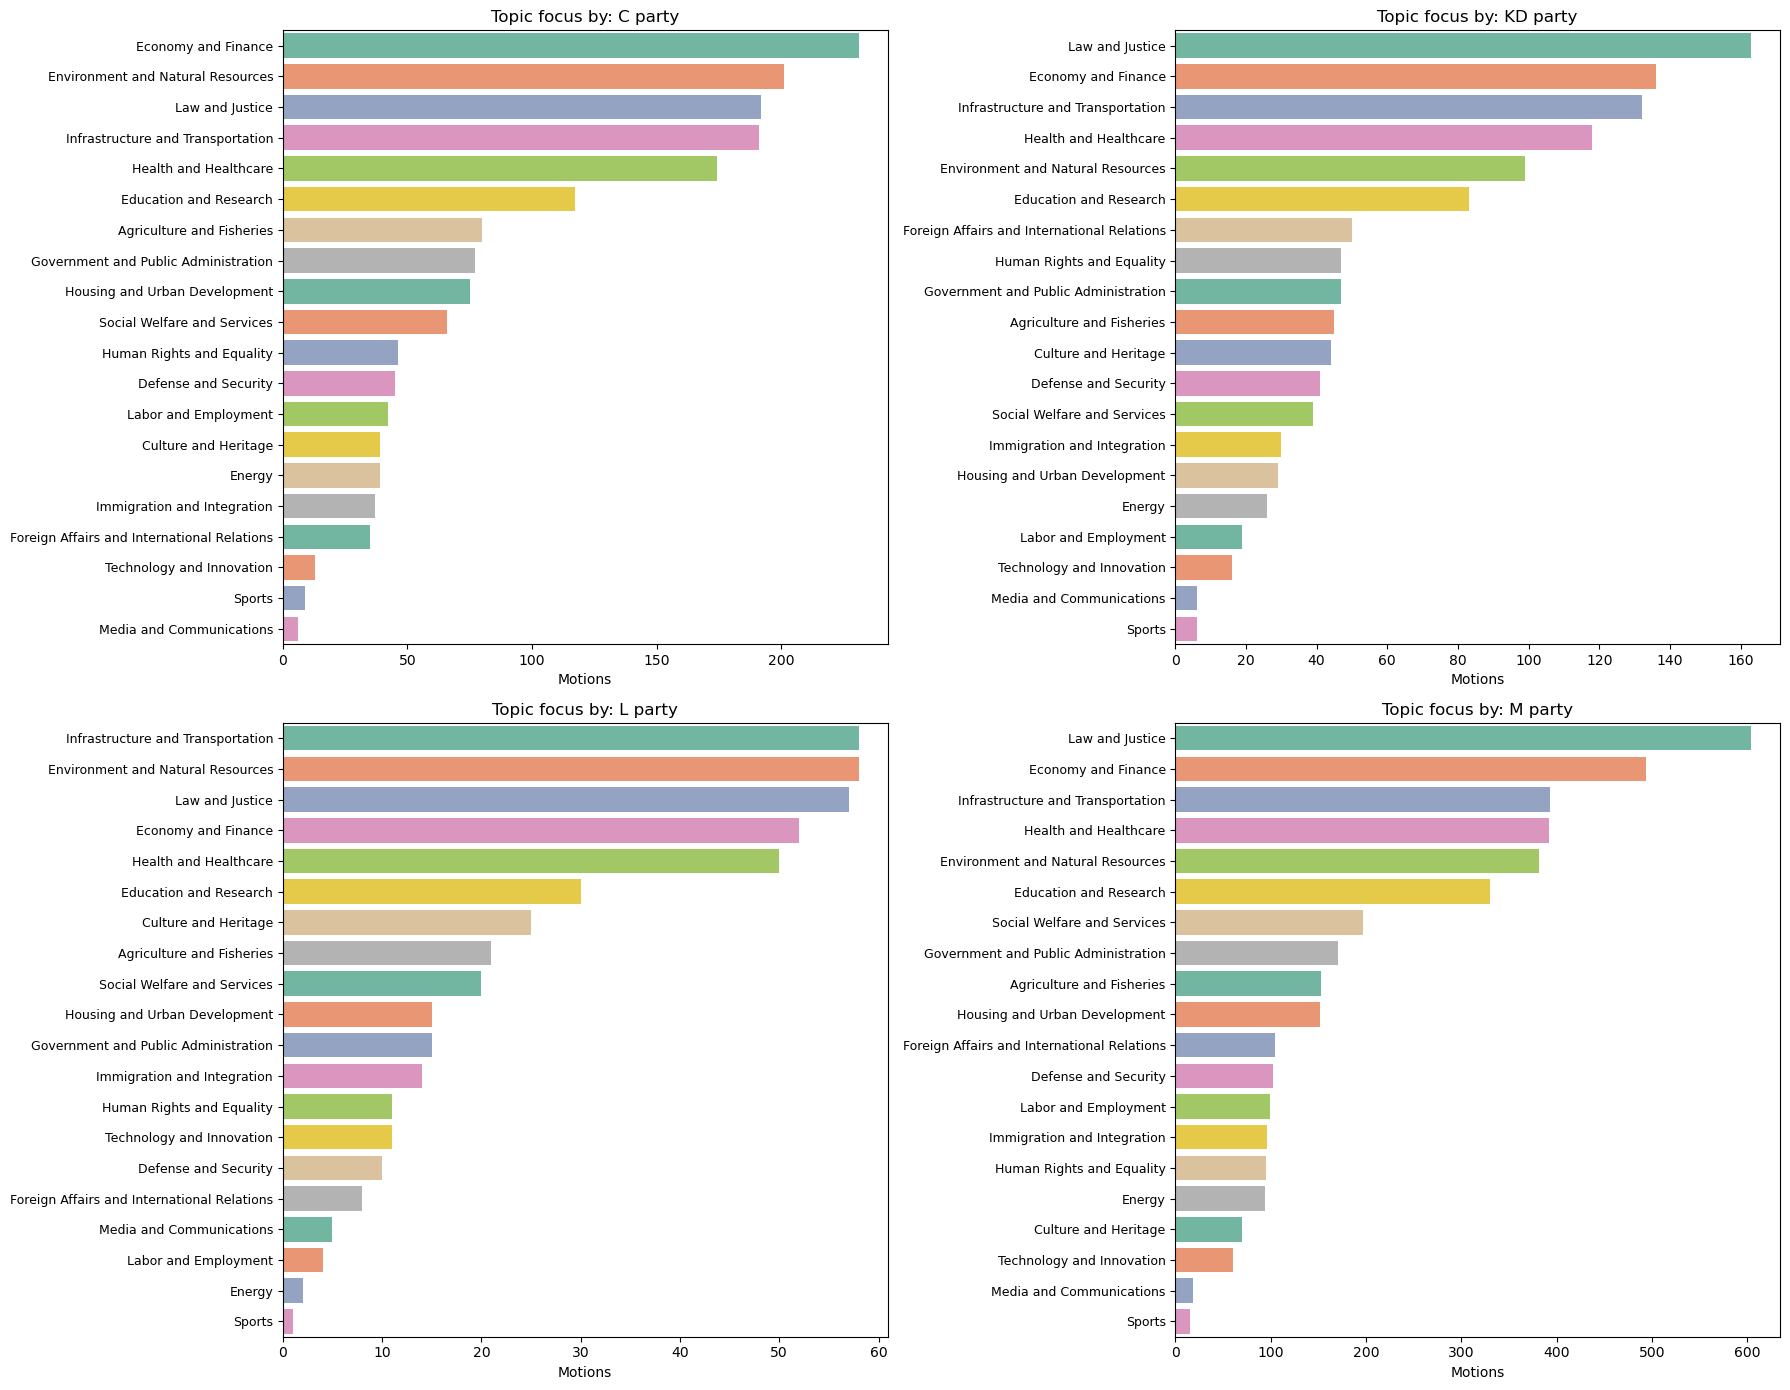

In [155]:
parties = party_focus_df["party"].unique()[:4]

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for ax, party in zip(axes, parties):

    df_party = (
        party_focus_df[party_focus_df["party"] == party]
        .sort_values(by="motions", ascending=False)
    )

    sns.barplot(
        data=df_party,
        y="key_political_area",  
        x="motions",
        hue="key_political_area",
        palette="Set2",
        ax=ax
    )

    ax.set_title(f"Topic focus by: {party} party")
    ax.set_xlabel("Motions")
    ax.set_ylabel("")
    ax.tick_params(axis="y", labelsize=9) 
plt.tight_layout()




#Different parties clearly prioritize different issues, as shown in these visualization.

M and KD focus strongly on Law and Justice and Economy and Finance.

C and L place more emphasis on Infrastructure, Environment, and Economy, reflecting development- and market-oriented agendas.

While core topics overlap, the intensity and ranking of issues differ, indicating distinct policy priorities rather than uniform debate focus.

 # The political compass

In [159]:
df_tmp.head()

,id,title,main_author,party,type,motion_id,handed_in,summary,economic_direction,democratic_direction,key_political_area,year
6503,2019/20:3451,med anledning av prop. 2019/20:64 Hemlig dataa...,Linda Westerlund Snecker,V,mot,Motion 2019/20:3451 av Linda Westerlund Snecke...,2020-01-15,This motion proposes measures to ensure unifor...,neutral,libertarian,Government and Public Administration,2020
6502,2019/20:3452,med anledning av prop. 2019/20:57 Vissa ytterl...,Ulla Andersson,V,mot,Motion 2019/20:3452 av Ulla Andersson m.fl. (V),2020-01-15,The motion proposes that the Swedish governmen...,left,authoritarian,Infrastructure and Transportation,2020
6496,2019/20:3458,med anledning av skr. 2019/20:54 Riksrevisione...,Julia Kronlid,SD,mot,Motion 2019/20:3458 av Julia Kronlid och Linda...,2020-01-16,The motion calls for the Swedish government to...,neutral,neutral,Human Rights and Equality,2020
6499,2019/20:3455,med anledning av skr. 2019/20:62 2019 års redo...,Linda Westerlund Snecker,V,mot,Motion 2019/20:3455 av Linda Westerlund Snecke...,2020-01-16,This motion proposes that the Swedish parliame...,neutral,libertarian,Health and Healthcare,2020
6498,2019/20:3456,med anledning av skr. 2019/20:50 Riksrevisione...,Bengt Eliasson,L,mot,Motion 2019/20:3456 av Bengt Eliasson m.fl. (L),2020-01-16,The proposal suggests the implementation of me...,neutral,authoritarian,Health and Healthcare,2020


In [256]:
#How do parties distribute across economic (left/right)
party_lr= df_tmp[df_tmp["economic_direction"].isin(["left", "right"])]
party_distribution=party_lr.groupby(["party","economic_direction"])["economic_direction"].size().unstack(fill_value=0)
party_distribution=pd.DataFrame(party_distribution)
party_distribution

economic_direction,left,right
party,,
C,699,306
KD,385,253
L,156,110
M,1162,1259
MP,376,122
S,1877,339
SD,996,758
V,333,114


In [257]:
# and democratic (authoritarian/libertarian) dimensions?
party_au_de= df_tmp[df_tmp["democratic_direction"].isin(["authoritarian","libertarian"])]
party_direction= party_au_de.groupby(["party","democratic_direction"])["democratic_direction"].size().unstack(fill_value=0)
party_direction=pd.DataFrame(party_direction)
party_direction

democratic_direction,authoritarian,libertarian
party,,
C,499,237
KD,366,180
L,148,66
M,1233,625
MP,259,84
S,1356,300
SD,1165,416
V,265,79


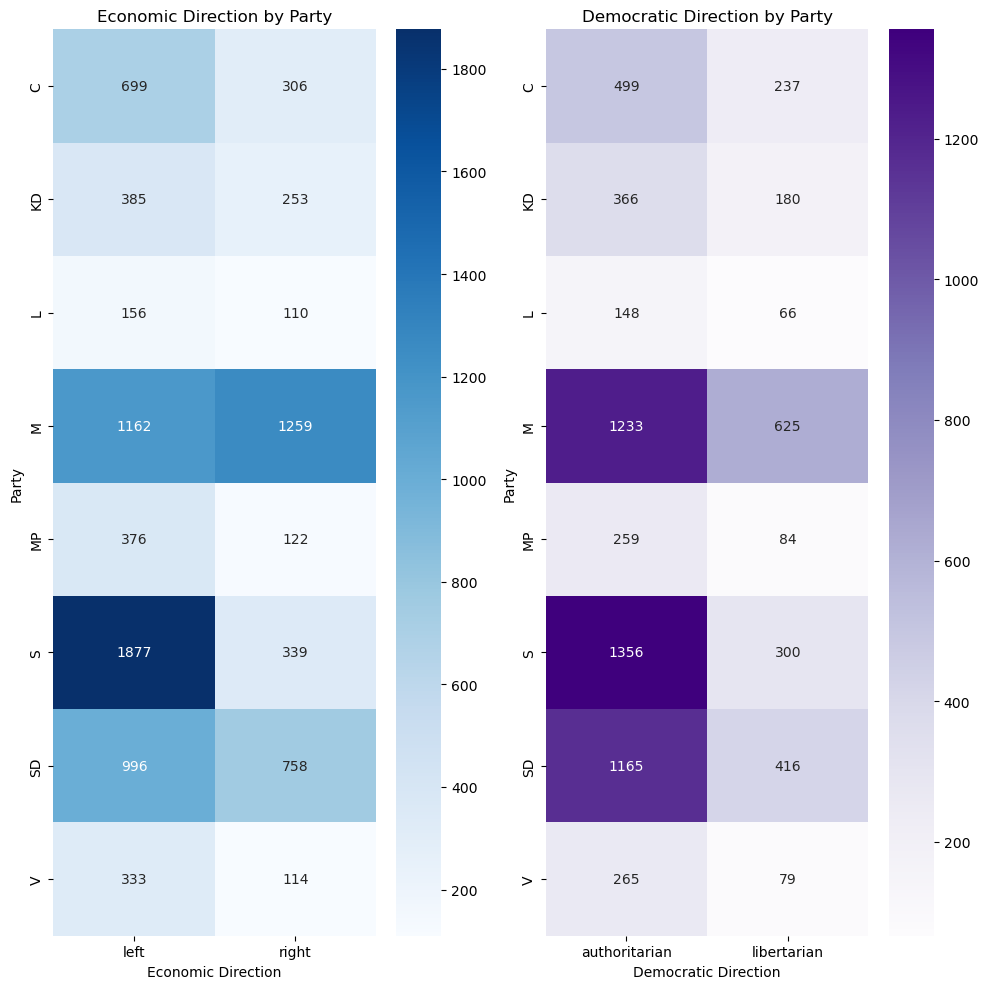

In [187]:
#parties distribute across economic (left/right)
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.heatmap(party_distribution, annot= True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Economic Direction by Party")
axes[0].set_xlabel("Economic Direction")
axes[0].set_ylabel("Party")

#parties distribute across democratic (authoritarian/libertarian)
sns.heatmap(party_direction, annot= True, fmt="d", cmap="Purples", ax=axes[1])
axes[1].set_title("Democratic Direction by Party")
axes[1].set_xlabel("Democratic Direction")
axes[1].set_ylabel("Party")

plt.tight_layout()
plt.show()

#Economic (left/right):- The data shows a clear left–right divide in economic focus: S, V, and MP submit significantly more left-leaning motions, while M and SD are more balanced, with M leaning slightly right.
C, KD, and L also show a modest left tilt, suggesting that most parties engage with both economic directions rather than operating exclusively on one side.

#Democratic (authoritarian/libertarian):-
Across parties, authoritarian-leaning motions dominate over libertarian ones, indicating a stronger emphasis on regulation, control, and state authority.
This pattern is especially pronounced for M, S, and SD, while smaller parties submit fewer motions overall but follow the same general distribution.


In [198]:
#Are some parties more ideologically consistent than others?
#economic consistency per party
economic_share =(party_distribution.div(party_distribution.sum(axis=1),axis=0))
economic_consistency= economic_share.max(axis=1)
eco_cons= economic_consistency.sort_values(ascending=False).rename("economic_consistency").reset_index()
eco_cons=pd.DataFrame(eco_cons)
#democratic consistency per party
demo_share =(party_direction.div(party_direction.sum(axis=1),axis=0))
demo_consistency= economic_share.max(axis=1)
demo_cons=demo_consistency.sort_values(ascending=False).rename("democratic_consistency").reset_index()
demo_cons=pd.DataFrame(demo_cons)

C:\Users\Subrata\AppData\Local\Temp\ipykernel_15016\2473445429.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\Subrata\AppData\Local\Temp\ipykernel_15016\2473445429.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


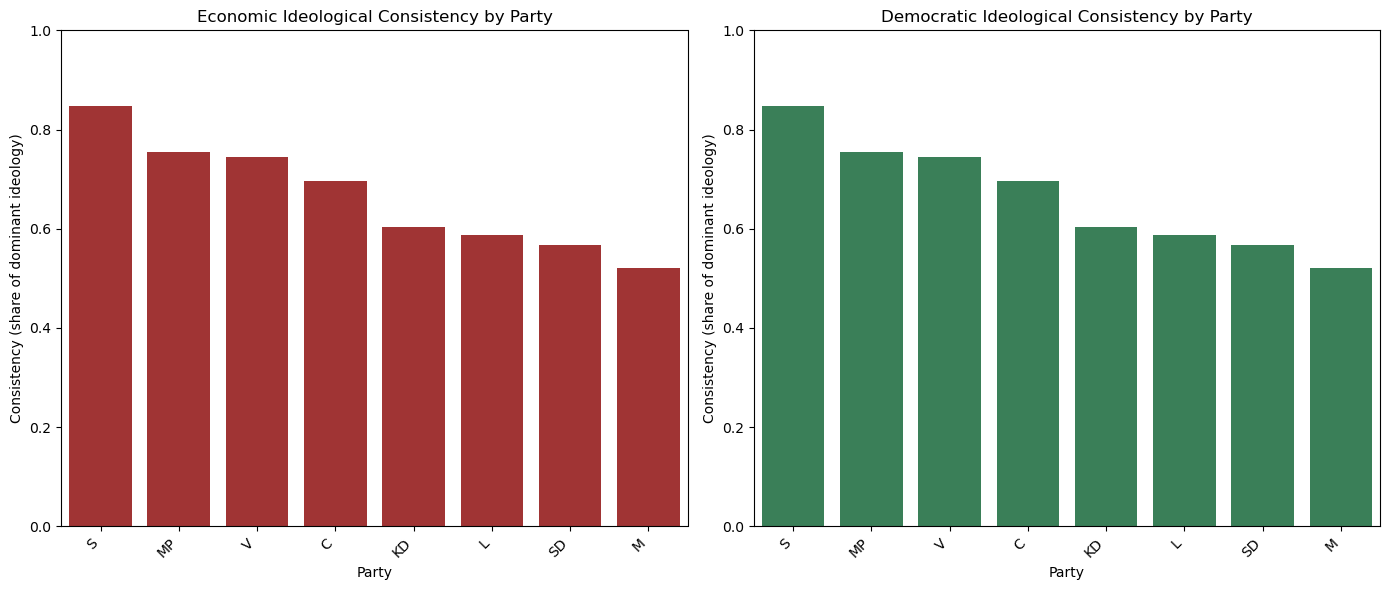

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Economic consistency
sns.barplot(
    data=eco_cons,
    x="party",
    y="economic_consistency",
    ax=axes[0],
    color="firebrick"
)
axes[0].set_title("Economic Ideological Consistency by Party")
axes[0].set_xlabel("Party")
axes[0].set_ylabel("Consistency (share of dominant ideology)")
axes[0].set_ylim(0, 1)

# Democratic consistency
sns.barplot(
    data=demo_cons,
    x="party",
    y="democratic_consistency",
    ax=axes[1],
    color="seagreen"
)
axes[1].set_title("Democratic Ideological Consistency by Party")
axes[1].set_xlabel("Party")
axes[1].set_ylabel("Consistency (share of dominant ideology)")
axes[1].set_ylim(0, 1)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


#Some parties are clearly more ideologically consistent than others.

S, MP, and V show the highest consistency on both economic and democratic dimensions, indicating a strong alignment with their dominant ideological positions.

M and SD display the lowest consistency, suggesting a more mixed or pragmatic approach across issues, while C, KD, and L fall in between.

# Trends over time

In [217]:
#How has parliamentary activity changed from 2020 to 2024?
activity_year = (
    df_tmp[df_tmp["year"].between(2020, 2024)]
    .groupby("year")
    .size()
    .reset_index(name="count")
)
activity_year

,year,count
0,2020,3973
1,2021,2377
2,2022,2706
3,2023,2870
4,2024,3283


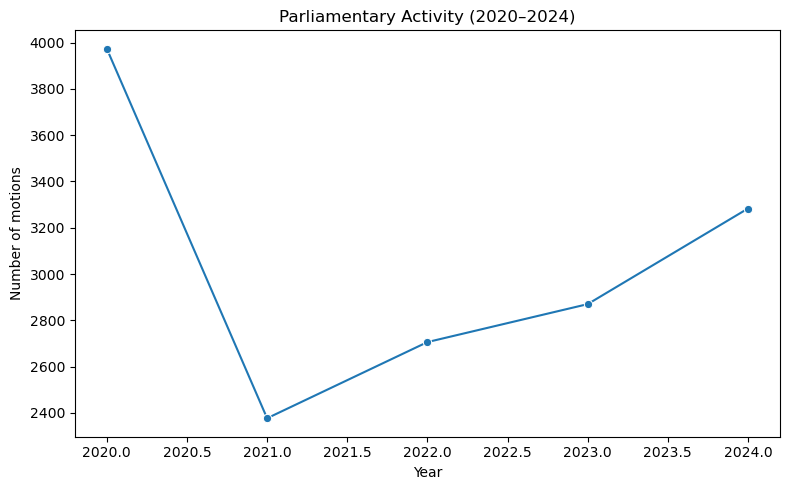

In [218]:
#'''How has parliamentary activity changed from 2020 to 2024?
plt.figure(figsize=(8, 5))

sns.lineplot(
    data=activity_year,
    x="year",
    y="count",
    marker="o"
)

plt.title("Parliamentary Activity (2020–2024)")
plt.xlabel("Year")
plt.ylabel("Number of motions")
plt.tight_layout()

#Parliamentary activity declined sharply from 2020 to 2021, dropping from 3,973 to 2,377 motions.
From 2022 onward, activity recovered steadily, reaching 3,283 motions in 2024, though still below the 2020 peak.

In [227]:
#Are certain topics rising or falling in importance?
activity_change = df_tmp.groupby(
    ["year", "key_political_area"]
)["year"].size()

activity_change = activity_change.to_frame(name="count")
activity_change= activity_change.reset_index()
data_years = activity_change[activity_change["year"].isin([2020, 2021, 2022, 2023, 2024])]

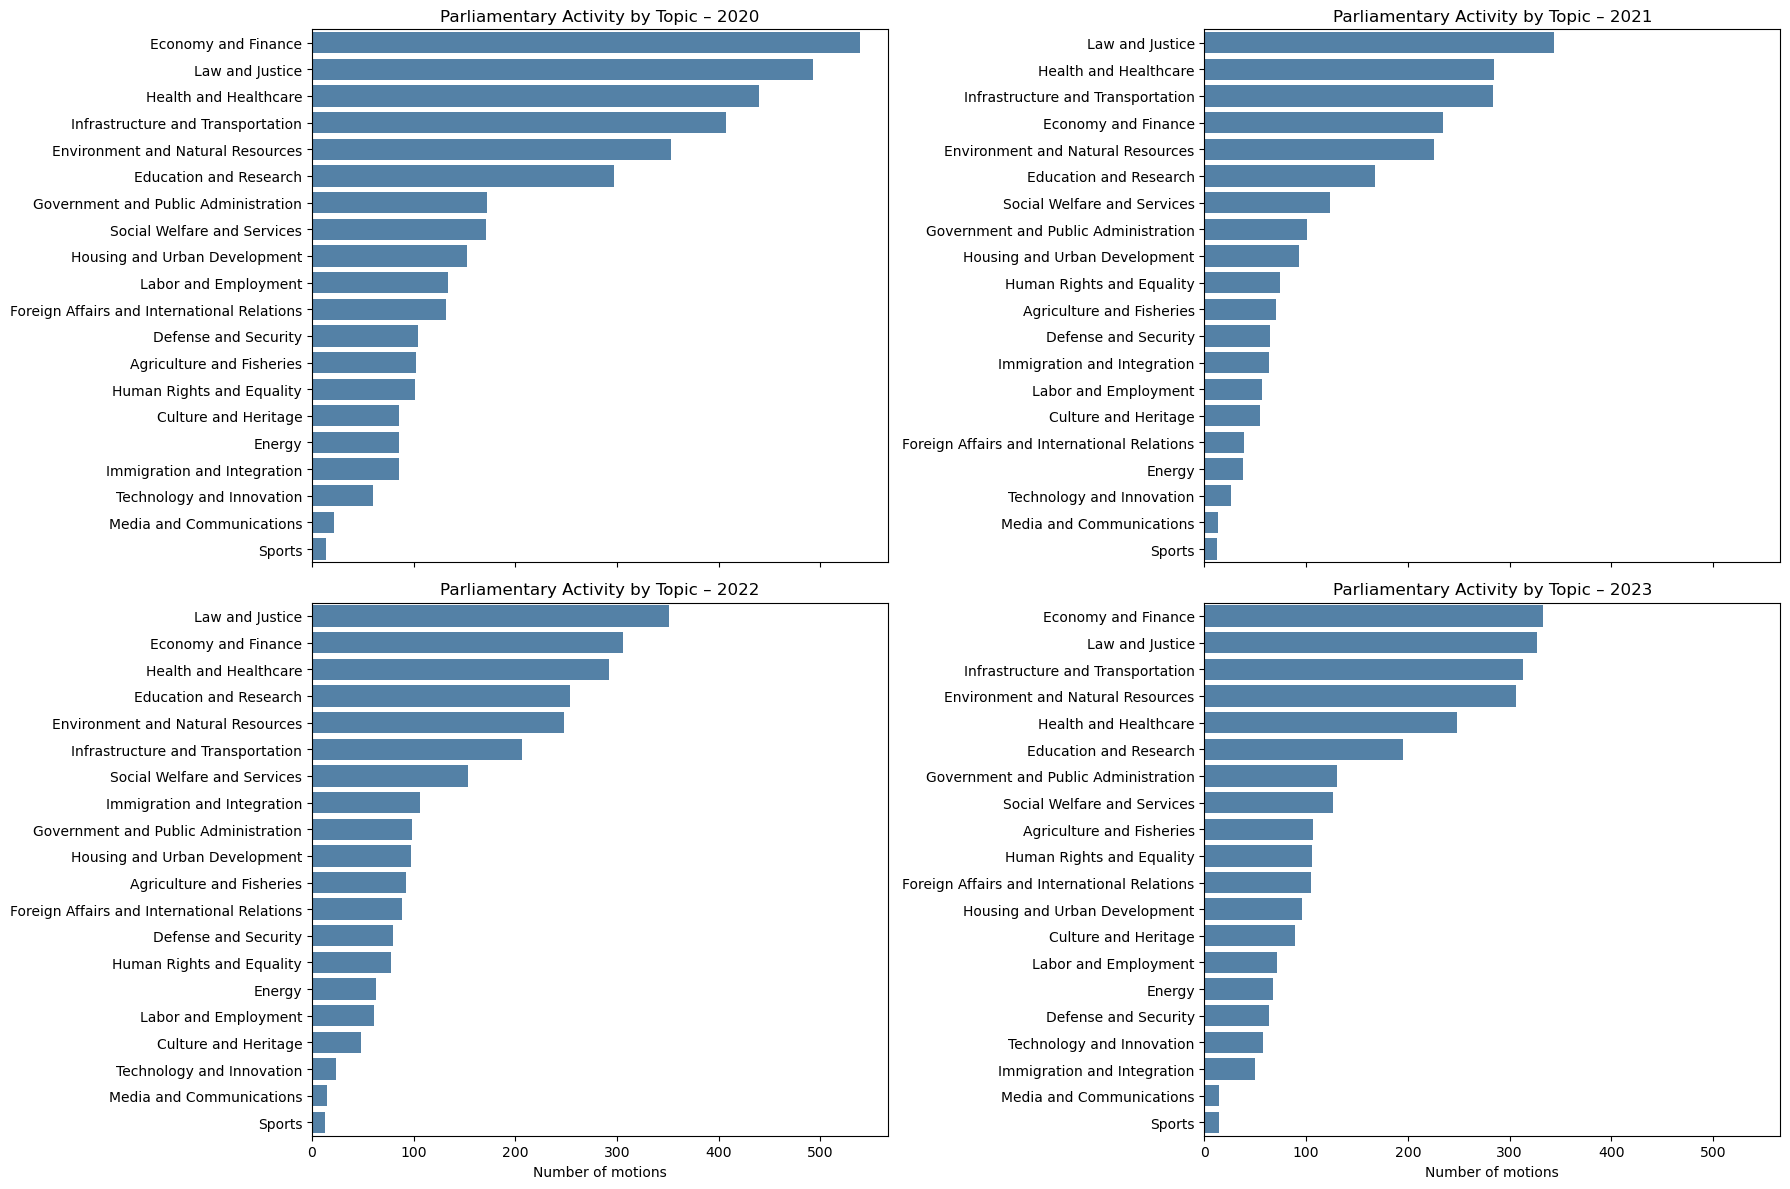

In [229]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True)
axes = axes.flatten()

for ax, year in zip(axes, years):

    df_year = (
        data_years[data_years["year"] == year]
        .sort_values("count", ascending=False)
    )

    sns.barplot(
        data=df_year,
        y="key_political_area",
        x="count",
        color="steelblue",
        ax=ax
    )

    ax.set_title(f"Parliamentary Activity by Topic – {year}")
    ax.set_xlabel("Number of motions")
    ax.set_ylabel("")

plt.tight_layout()


#There are clear shifts in topic importance over time.

Health and Healthcare peaks in 2020–2021 and declines afterward, consistent with a pandemic-driven agenda.

Economy and Finance and Law and Justice regain prominence from 2022 onward, while Environment and Infrastructure show steady growth.

# Deep Dive

In [230]:
df_tmp.head()

,id,title,main_author,party,type,motion_id,handed_in,summary,economic_direction,democratic_direction,key_political_area,year
6503,2019/20:3451,med anledning av prop. 2019/20:64 Hemlig dataa...,Linda Westerlund Snecker,V,mot,Motion 2019/20:3451 av Linda Westerlund Snecke...,2020-01-15,This motion proposes measures to ensure unifor...,neutral,libertarian,Government and Public Administration,2020
6502,2019/20:3452,med anledning av prop. 2019/20:57 Vissa ytterl...,Ulla Andersson,V,mot,Motion 2019/20:3452 av Ulla Andersson m.fl. (V),2020-01-15,The motion proposes that the Swedish governmen...,left,authoritarian,Infrastructure and Transportation,2020
6496,2019/20:3458,med anledning av skr. 2019/20:54 Riksrevisione...,Julia Kronlid,SD,mot,Motion 2019/20:3458 av Julia Kronlid och Linda...,2020-01-16,The motion calls for the Swedish government to...,neutral,neutral,Human Rights and Equality,2020
6499,2019/20:3455,med anledning av skr. 2019/20:62 2019 års redo...,Linda Westerlund Snecker,V,mot,Motion 2019/20:3455 av Linda Westerlund Snecke...,2020-01-16,This motion proposes that the Swedish parliame...,neutral,libertarian,Health and Healthcare,2020
6498,2019/20:3456,med anledning av skr. 2019/20:50 Riksrevisione...,Bengt Eliasson,L,mot,Motion 2019/20:3456 av Bengt Eliasson m.fl. (L),2020-01-16,The proposal suggests the implementation of me...,neutral,authoritarian,Health and Healthcare,2020


In [240]:
#which parties engage with healthcare
health_by_party= (df_tmp[df_tmp["key_political_area"]=='Health and Healthcare'].groupby("party").size().reset_index(name= "count")).sort_values(by= "count",ascending= False)
health_by_party=pd.DataFrame(heath_by_party)
health_by_party

,party,count
5,S,393
3,M,392
6,SD,365
0,C,174
1,KD,118
4,MP,75
7,V,64
2,L,50


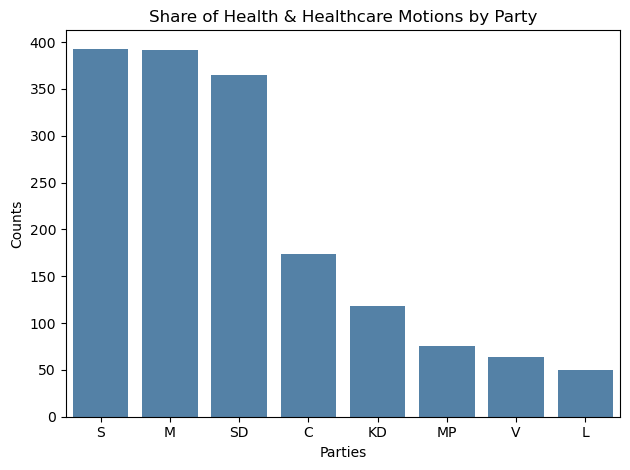

In [243]:
sns.barplot(
    data=health_by_party,
    y="count",
    x="party",
    color="steelblue"
)

plt.title("Share of Health & Healthcare Motions by Party")
plt.xlabel("Parties")
plt.ylabel("Counts")
plt.tight_layout()

#Engagement with healthcare issues is led by Socialdemokraterna (S) and Moderaterna (M), each submitting close to 400 health-related motions, followed by Sverigedemokraterna (SD).
Other parties engage at lower levels, with C and KD showing moderate involvement, while MP, V, and L contribute relatively few healthcare motions.

In [253]:
#Find the most prolific author and characterize their focus areas
author_area= df_tmp.groupby(["main_author", "key_political_area"])["main_author"].value_counts().sort_values(ascending= False).head(6)
author_area=pd.DataFrame(author_area)
author_area= author_area.reset_index()
author_area

,main_author,key_political_area,count
0,Sten Bergheden,Economy and Finance,87
1,Markus Wiechel,Health and Healthcare,84
2,Markus Wiechel,Law and Justice,78
3,Sten Bergheden,Environment and Natural Resources,74
4,Ann-Sofie Lifvenhage,Health and Healthcare,70
5,Markus Wiechel,Environment and Natural Resources,61


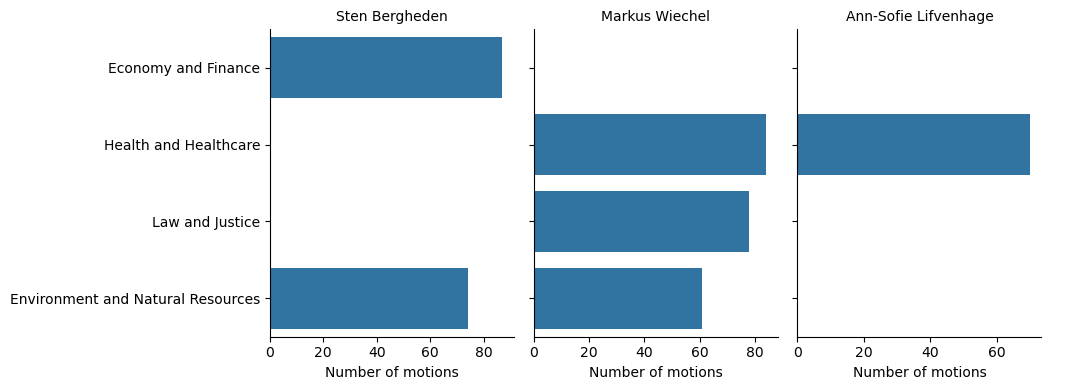

In [255]:
g= sns.catplot(
    data=author_area,
    x="count",
    y="key_political_area",
    col="main_author",
    kind="bar",
    height=4,
    aspect=0.9,
    sharex=False
)

g.set_titles("{col_name}")
g.set_xlabels("Number of motions")
g.set_ylabels("")


#Markus Wiechel is the most prolific author overall and shows a strong focus on Health and Healthcare, Law and Justice, and Environment and Natural Resources, indicating broad but issue-heavy engagement.
Sten Bergheden also stands out, primarily concentrating on Economy and Finance and environmental issues, while Ann-Sofie Lifvenhage focuses mainly on health-related policy.

# My Conclusion:- 

1. Parliamentary motion activity is unevenly distributed, with a small number of parties (M, S, SD) and individuals driving most submissions.

2. Overall activity declined sharply in 2021 and then recovered steadily through 2024, though not reaching the 2020 peak.

3. Law and Justice, Economy and Finance, and Health and Healthcare consistently dominate parliamentary debate.

4. Parties show distinct issue priorities, reflecting ideological and strategic differences rather than uniform agendas.

5. On economic and democratic dimensions, S, MP, and V exhibit higher ideological consistency, while M and SD are more mixed.

6. Healthcare engagement is led by S and M, with SD also highly active, indicating cross-bloc importance of the issue.

7. A small number of politicians—especially Markus Wiechel—are highly prolific and tend to specialize in a few core policy areas.